In [1]:
from collections import Counter
import datetime
import functools
import itertools
import os
from pathlib import Path

import re
import string
from timeit import default_timer
import warnings; warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score

from utils import *
from graph_utils import *
from series_utils import *
from topic_utils import *

In [3]:
%matplotlib notebook
plt.style.use("bmh")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
counts = ['like_count',
         'quote_count',
         'reply_count',
         'retweet_count',
         ]
plot_stats = ['mean',
             'std',
             ]
stats = ['mean',
         'std',
         'min',
         'max',
        ]

## Data: multiple campaigns
Using data from campaigns in Iran in September 2020 and December 2020

In [5]:
users = UsersData('data/users')
tweets = TweetsData('data/tweets')
df = tweets.df.loc[:][:]
user_df = users.df.loc[:][:]

In [7]:
campaign = df[df['government'] == 'iran']
campaign_users = user_df[user_df['government'] == 'iran']

In [10]:
campaign_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, XpT328jUSYUJJM4Bt0HmKSJ8d8rJWgkBkQhdff62skE= to BBsTYXJDsCvRvnfakEivqqKtHssmZAJ8M40n+C0kJaU=
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_display_name         342 non-null    string        
 1   user_screen_name          342 non-null    string        
 2   user_reported_location    183 non-null    string        
 3   user_profile_description  292 non-null    string        
 4   user_profile_url          67 non-null     string        
 5   follower_count            342 non-null    int64         
 6   following_count           342 non-null    int64         
 7   account_creation_date     342 non-null    datetime64[ns]
 8   account_language          342 non-null    string        
 9   file                      342 non-null    string        
 10  campaign                  342 non-null    string        
 11  relea

In [15]:
campaign_users['campaign'].value_counts()

iran202012    238
iran092020    104
Name: campaign, dtype: Int64

In [19]:
grouped = (campaign
          .groupby(['campaign'])
          )
grouped.size()

campaign
iran092020      2450
iran202012    560571
dtype: int64

In [38]:
keys = grouped.groups.keys()
keys

dict_keys(['iran092020', 'iran202012'])

In [28]:
[c1, c2] = grouped.groups.keys()

In [32]:
for group in grouped.groups.keys():
    campaign_start = min(grouped
                         .get_group(group)
                         .tweet_time
                        )
    campaign_end = max(grouped
                     .get_group(group)
                     .tweet_time
                    )
    campaign_period = campaign_end - campaign_start

    print('{}: start {}, end {}, duration {}'.format(group,
                                                     campaign_start,
                                                     campaign_end,
                                                     campaign_period))

iran092020: start 2020-01-08 17:43:00, end 2020-07-01 07:52:00, duration 174 days 14:09:00
iran202012: start 2009-09-06 13:56:00, end 2020-12-27 18:08:00, duration 4130 days 04:12:00


<IPython.core.display.Javascript object>


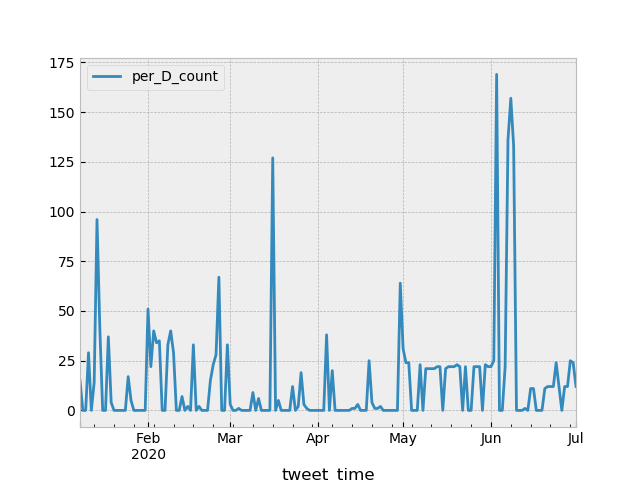

In [37]:
make_timeline((grouped.get_group(c1)),
              'D').plot()

<IPython.core.display.Javascript object>


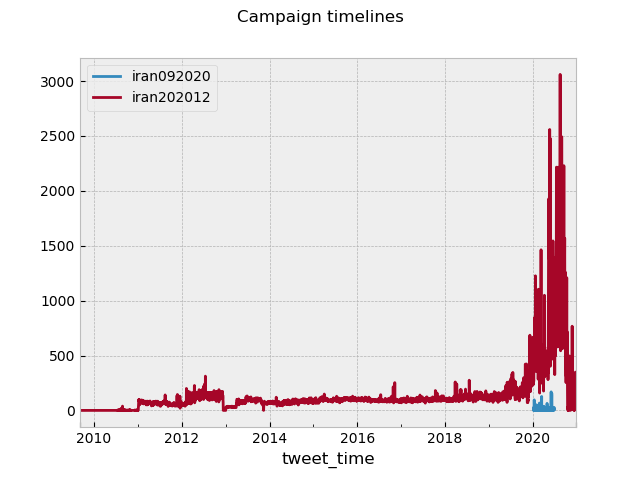

Text(0.5, 0.98, 'Campaign timelines')

In [42]:
fig, ax = plt.subplots()

for group in keys:
    (make_timeline((grouped.get_group(group)),
                  'D')
     .rename(columns={'per_D_count': '{}'.format(group)})
    ).plot(ax=ax)


fig.suptitle('Campaign timelines')

In [ ]:
overlap = (grouped
          )